# Datasource
Multpl.com
https://www.multpl.com/

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_and_process_data(url, column_name):
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, "html.parser")

        # Find the table containing the data
        table = soup.find("table")

        # Extract table headers
        headers = [th.text.strip() for th in table.find_all("th")]

        # Extract table rows
        rows = []
        for row in table.find_all("tr")[1:]:
            rows.append([td.text.strip() for td in row.find_all("td")])

        # Create a Pandas DataFrame
        df = pd.DataFrame(rows, columns=headers)

        # Convert the 'Date' column to datetime object
        df['Date'] = pd.to_datetime(df['Date'])

        # Convert the 'Value' column to float for numeric values, keeping strings as is
        def convert_to_float(value):
            try:
                # Remove non-numeric characters and commas
                cleaned_value = ''.join(char for char in value if char.isdigit() or char == '.')
                return float(cleaned_value)
            except ValueError:
                return value

        df[column_name] = pd.to_numeric(df['Value'].apply(convert_to_float), errors='coerce')

        # Set 'Date' column as the index
        df.set_index('Date', inplace=True)

        # Drop the original 'Value' column if needed
        df.drop(columns=['Value'], inplace=True)

        return df

    else:
        print(f"Failed to retrieve the webpage. Status Code: {response.status_code}")
        return None

# S&P500 Related Indicators

,S&P500 Price
Date,
1871-05-01,4.86
1871-04-01,4.74
1871-03-01,4.61
1871-02-01,4.50
1871-01-01,4.44


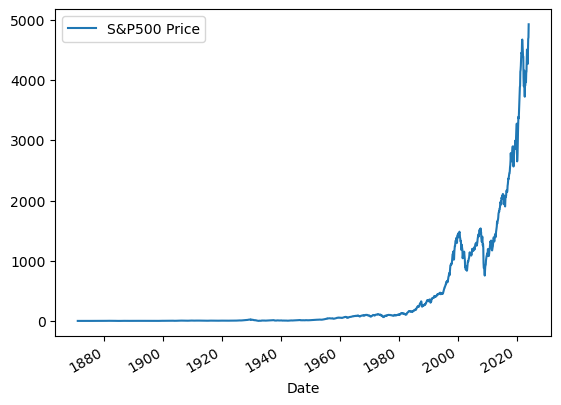

In [2]:
# S&P500 Historical Price:
url = "https://www.multpl.com/s-p-500-historical-prices/table/by-month"
column_name = "S&P500 Price"
df_sp_price = scrape_and_process_data(url, column_name)

df_sp_price.plot();
df_sp_price.tail()

,S&P500 Price - Inflation Adjusted
Date,
1871-05-01,121.62
1871-04-01,115.88
1871-03-01,108.63
1871-02-01,107.61
1871-01-01,109.41


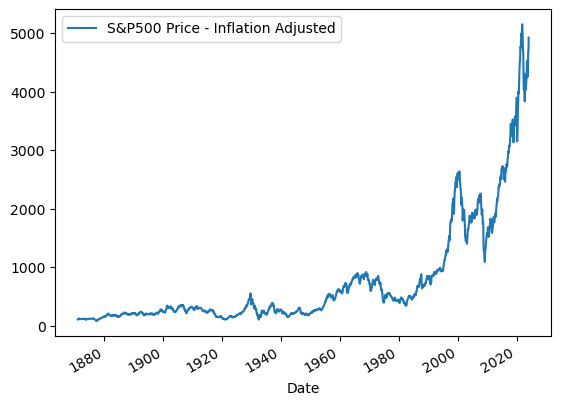

In [3]:
# S&P500 Historical Price (inflation adjusted)
url = "https://www.multpl.com/inflation-adjusted-s-p-500/table/by-month"
column_name = "S&P500 Price - Inflation Adjusted"
df_sp_adj = scrape_and_process_data(url, column_name)

df_sp_adj.plot();
df_sp_adj.tail()

,S&P500 Dividend Yield
Date,
1871-05-31,5.35
1871-04-30,5.49
1871-03-31,5.64
1871-02-28,5.78
1871-01-31,5.86


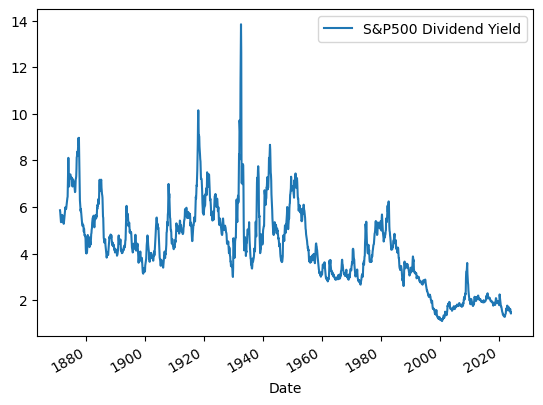

In [4]:
# S&P500 Dividend Yield:
url = "https://www.multpl.com/s-p-500-dividend-yield/table/by-month"
column_name = "S&P500 Dividend Yield"
df_sp_div = scrape_and_process_data(url, column_name)

df_sp_div.plot();
df_sp_div.tail()

,S&P500 PE ratio
Date,
1871-05-01,12.15
1871-04-01,11.85
1871-03-01,11.52
1871-02-01,11.25
1871-01-01,11.10


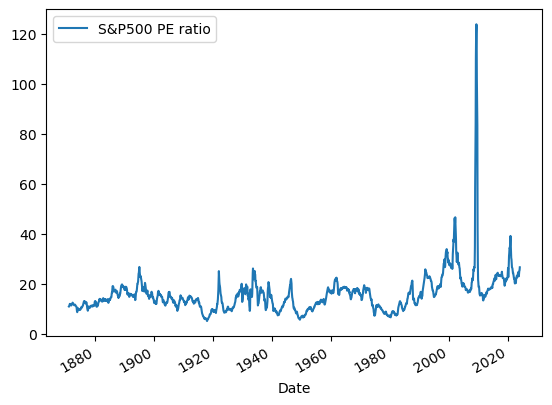

In [5]:
# S&P500 Price to Earnings Ratio:
url = "https://www.multpl.com/s-p-500-pe-ratio/table/by-month"
column_name = "S&P500 PE ratio"
df_sp_pe = scrape_and_process_data(url, column_name)

df_sp_pe.plot();
df_sp_pe.tail()

,S&P500 Earnings
Date,
1875-12-31,10.10
1874-12-31,12.27
1873-12-31,11.60
1872-12-31,10.20
1871-12-31,9.71


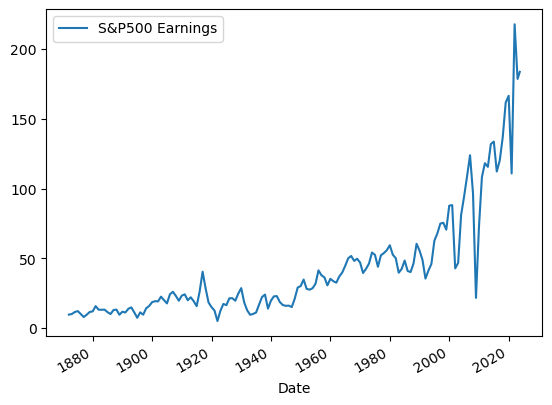

In [6]:
# S&P500 Earnings:
url = "https://www.multpl.com/s-p-500-earnings/table/by-year"
column_name = "S&P500 Earnings"
df_sp_eps = scrape_and_process_data(url, column_name)

df_sp_eps.plot();
df_sp_eps.tail()

,S&P500 Earnings Yield
Date,
1871-05-01,8.23
1871-04-01,8.44
1871-03-01,8.68
1871-02-01,8.89
1871-01-01,9.01


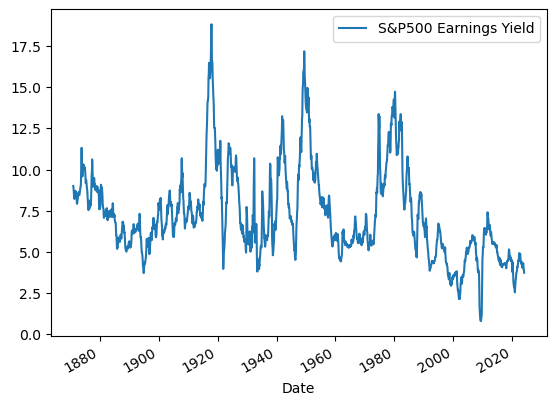

In [7]:
# S&P500 Earnings Yield
url = "https://www.multpl.com/s-p-500-earnings-yield/table/by-month"
column_name = "S&P500 Earnings Yield"
df_sp_ey = scrape_and_process_data(url, column_name)

df_sp_ey.plot();
df_sp_ey.tail()

,Shiller PE Ratio
Date,
1871-06-01,12.59
1871-05-01,12.59
1871-04-01,12.05
1871-03-01,11.19
1871-02-01,10.92


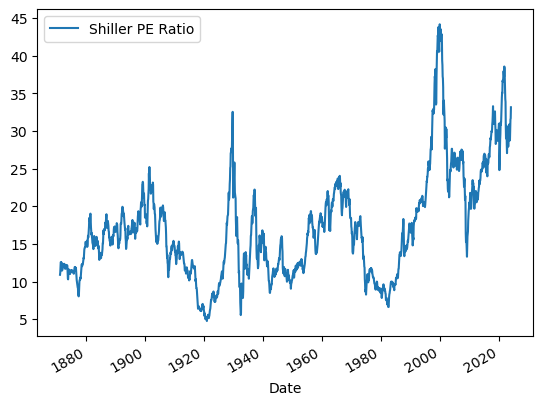

In [8]:
# Shiller PE Ratio
# Shiller PE Ratio is the cyclically adjusted price-to-earnings ratio
url = "https://www.multpl.com/shiller-pe/table/by-month"
column_name = "Shiller PE Ratio"
df_sp_shiller = scrape_and_process_data(url, column_name)

df_sp_shiller.plot();
df_sp_shiller.tail()

# Macro Indicators

,case Shiller Home Price Index
Date,
1894-12-01,190.72
1893-12-01,152.74
1892-12-01,135.53
1891-12-01,134.71
1890-12-01,142.14


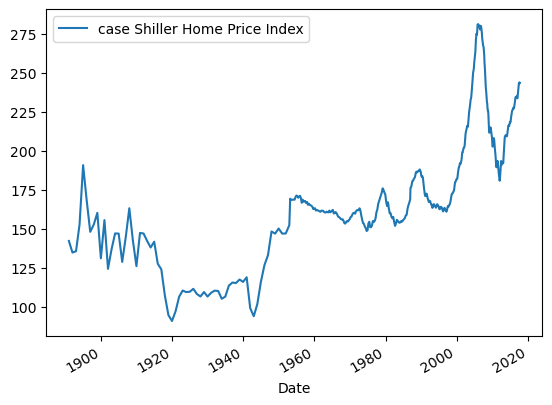

In [9]:
# Case Shiller Home Price Index
url = "https://www.multpl.com/case-shiller-home-price-index-inflation-adjusted/table/by-month"
column_name = "case Shiller Home Price Index"
df_case_shiller = scrape_and_process_data(url, column_name)

df_case_shiller.plot();
df_case_shiller.tail()

,Inflation Rate
Date,
1872-05-01,7.01
1872-04-01,4.54
1872-03-01,1.46
1872-02-01,1.48
1872-01-01,1.52


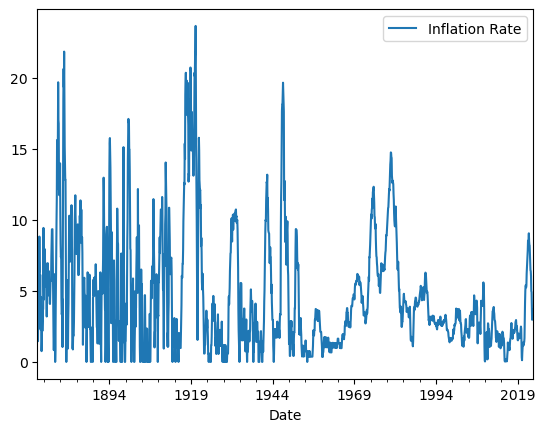

In [10]:
# US Inflation Rate
# US Inflation rate is 12-month change in CPI
url = "https://www.multpl.com/inflation/table/by-month"
column_name = "Inflation Rate"
df_inf = scrape_and_process_data(url, column_name)

df_inf.plot();
df_inf.tail()